In [13]:
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout,Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D,LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [14]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")
df=df.dropna()
x=df.drop(columns="label",axis=1)
y=df["label"]
voc_size=5000
nltk.download("stopwords")
ps=PorterStemmer()
messages=x.copy()
messages.reset_index(inplace=True)
print(x['title'])
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages["title"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word)for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object


In [22]:
oh=[one_hot(word,voc_size) for word in corpus]
sent_len=20
ed=pad_sequences(oh,dtype="int32",padding="pre",maxlen=sent_len)

In [57]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
x_Final=ed

y_Final=y
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.33, random_state=42)

In [59]:
history=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 15s 55ms/step - loss: 0.3631 - accuracy: 0.8249 - val_loss: 0.2196 - val_accuracy: 0.9137
Epoch 2/10
192/192 [==============================] - 10s 50ms/step - loss: 0.1505 - accuracy: 0.9396 - val_loss: 0.2566 - val_accuracy: 0.9056
Epoch 3/10
192/192 [==============================] - 10s 51ms/step - loss: 0.1297 - accuracy: 0.9522 - val_loss: 0.2433 - val_accuracy: 0.9137
Epoch 4/10
192/192 [==============================] - 10s 51ms/step - loss: 0.1209 - accuracy: 0.9548 - val_loss: 0.2162 - val_accuracy: 0.9150
Epoch 5/10
192/192 [==============================] - 10s 50ms/step - loss: 0.0943 - accuracy: 0.9659 - val_loss: 0.3245 - val_accuracy: 0.8994
Epoch 6/10
192/192 [==============================] - 10s 50ms/step - loss: 0.0790 - accuracy: 0.9677 - val_loss: 0.2583 - val_accuracy: 0.9125
Epoch 7/10
192/192 [==============================] - 10s 52ms/step - loss: 0.0667 - accuracy: 0.9734 - val_loss: 0.3623 - val_accuracy:

In [60]:
pred=model1.predict_classes(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[3162,  257],
       [ 285, 2331]])

In [62]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9101905550952776

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3419
           1       0.90      0.89      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



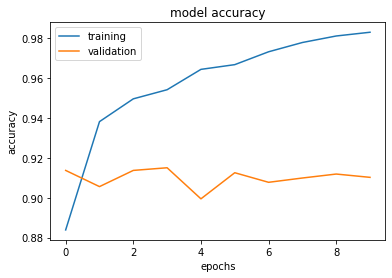

<Figure size 1440x720 with 0 Axes>

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
FILTERS_SIZE = 16
KERNEL_SIZE = 5

# Define embeddings dimensions (columns in matrix fed into CNN and nodes in hidden layer of built-in keras function)
EMBEDDINGS_DIM = 10

# Hyperparameters for model tuning
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 7


In [ ]:
model=Sequential()
model.add(Embedding(1000,10,input_length=len(x_train)))
model.add(Conv1D(16,10,activation="relu"))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#optimizer = optimizers.Adam(lr=0.01)
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 4160, 10)          10000     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4151, 16)          1616      
_________________________________________________________________
dropout_17 (Dropout)         (None, 4151, 16)          0         
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 16)                0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=BATCH_SIZE, epochs=EPOCHS)

# summarize accuracy by epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.figure(figsize=(20,10))
plt.show()


Epoch 1/7


ValueError: ignored